In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython

import cv2

config_ipython()
setup_matplotlib()
set_css_style()

# Blurring an image

*Blurring* is also called *smoothing* and it is an operation typically used to reduce noise on the source. It consists in applying a filter to the image. Let's see what this means.

The operation goes like this:

$$
g(i,j) = \sum_{h,l} f(i+h, j+l) K(h,l) \ ,
$$

where $g(i,j)$ represents the transformed value of the pixel at position $(i,j)$, $K(h,l)$ is the *kernel* and $f$ represents the original pixels. What the sum is doing is weighing every pixel by the kernel and considering its neighborhood. The kernel is a matrix which determines how should the neighborhood be factored in.


In the following, we'll go through some common types of filters and we'll try them out on a sample image.

## The original image

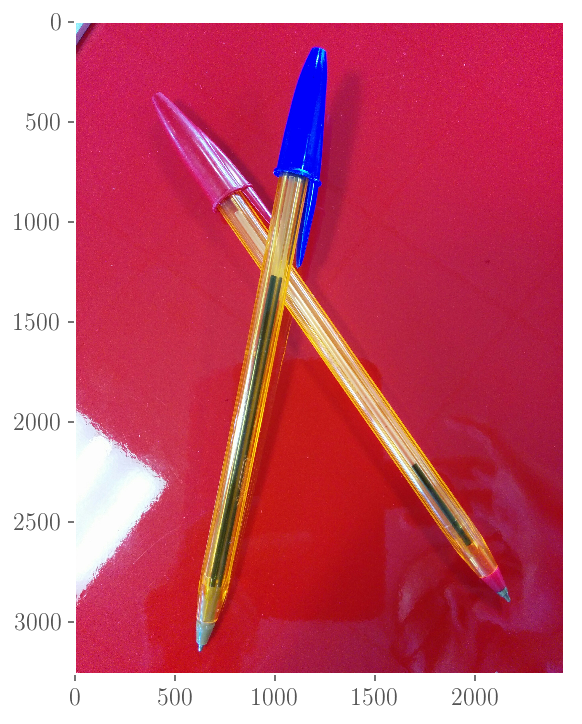

In [5]:
# read an image with OpenCV

image = cv2.imread('../../imgs/pens.jpg')

# transform into RGB as OpenCV reads in BGR (and Matplotlib uses RGB)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show it
plt.imshow(RGB_image)
plt.grid()
plt.show();

## Common types of filters and trying them out

### Normalised Box Filter

Each pixel value gets transformed into the mean of its neighbours, each of which contributes with equal weight:. The kernel $K$ is a matrix with the same value at each place, and this value is

$$
k = \frac{1}{k_w k_h} \ ,
$$

where $k_w, k_h$ are the (width and height) dimensions of the matrix. In other words, this filter is considering a neighborhood rectangle of dimension $k_w \times k_h$ around each pixel and averaging the intensities values inside it, assigning to pixels.

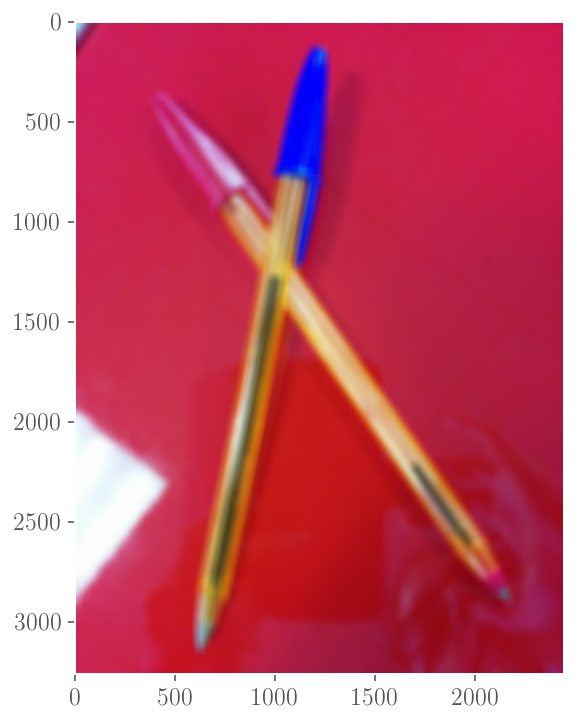

In [6]:
# a normalised box filter with kernel 50X50 and showing result
nb = cv2.blur(RGB_image, (50, 50))

plt.imshow(nb)
plt.grid()
plt.show();

### Gaussian Filter

It's the most popular but not the fastest. The kernel is given by a gaussian in 2 dimensions, so that at a point $(x, y)$ it is:

$$
K(x, y) = \frac{1}{2 \pi \sigma_x \sigma_y} e^{-\frac{(x - \mu_x)^2}{2 \sigma_x^2}} e^{-\frac{(y - \mu_y)^2}{2 \sigma_y^2}} 
$$

This way, the pixel in the middle is given the largest weight and this weight decreases normally with distance to the pixel in consideration. Look at the [docs](http://docs.opencv.org/3.2.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) for the implementation of this filter in OpenCV3. 

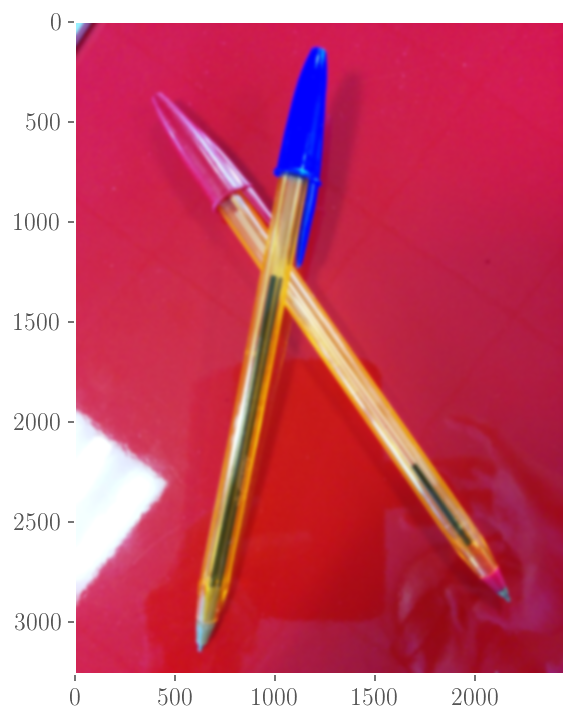

In [16]:
# a Gaussian filter with kernel 49X49 and  and showing result
# Note that the third (required) arg is the sigma_x, if 0 means both sigma_x and sigma_y are calculated from the
# kernel size. Also note kernel size must be odd (not sure why this constraint)
gb = cv2.GaussianBlur(RGB_image, (49, 49), 0)

plt.imshow(gb)
plt.grid()
plt.show();

### Median Filter

Each pixel gets replaced with the median of its neighbours (those in a square around it).

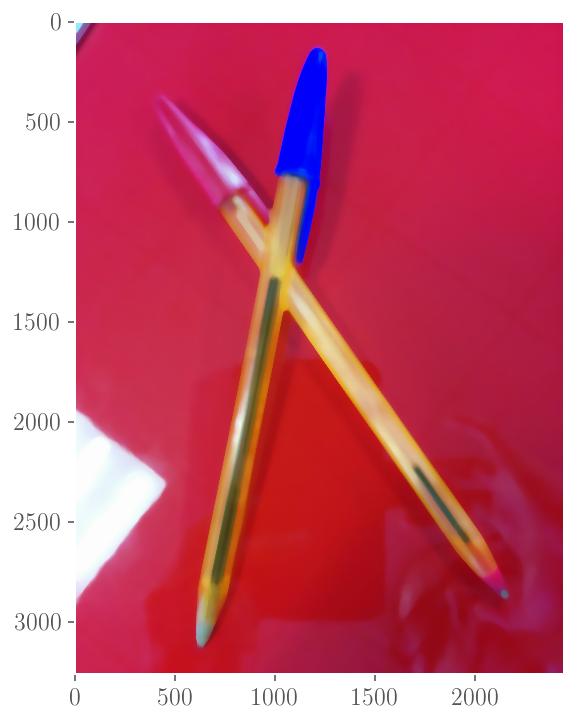

In [24]:
# a median filter with kernel 49X49 and  and showing result
# Note kernel size must be odd as for the gaussian (?)
mb = cv2.medianBlur(RGB_image, 49)

plt.imshow(mb)
plt.grid()
plt.show();

### Bilateral Filter

Avoids (to a certain extent) smoothing the edges in a picture (all other filters don't avoid that). Considers neighbouring pixels with weight. In a region of pixels similar in intensity, it will replace pixel with the average of neighborhood, acting similarly to other filters; in a region where there is a boundary of two intensity areas, that is, a region where pixels on one side are sensibly brighter than those on the other side, a bilateral filter yields a value of $1$ for pixels on the same side and $0$ for the others. See [[1]](#bilateral) fir

Note that it's a quite slow algorithm, especially for large diameters of the neighborhood.

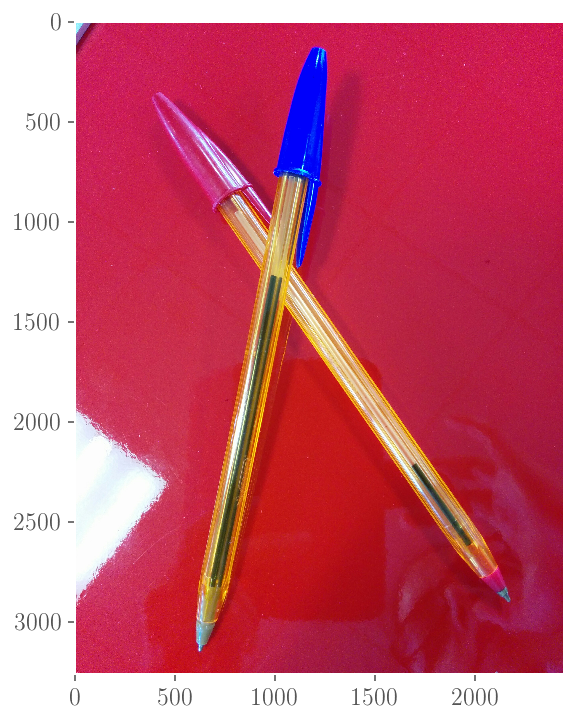

In [28]:
# a bilateral filter with kernel of diameter 15 and 
bb = cv2.bilateralFilter(RGB_image, 15, 2, 2)

plt.imshow(bb)
plt.grid()
plt.show();

## References

1. <a name="bilateral"></a> A detailed [explanation](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html) of the bilateral filter